,ï..Date,Spot,Date,Prices,Returns
,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,"May 20, 1987",18.63,"May 20, 1987",18.63,NA
2,"May 21, 1987",18.45,"May 21, 1987",18.45,-0.009708814
3,"May 22, 1987",18.55,"May 22, 1987",18.55,0.005405419
4,"May 25, 1987",18.60,"May 25, 1987",18.60,0.002691792
5,"May 26, 1987",18.63,"May 26, 1987",18.63,0.001611604
6,"May 27, 1987",18.60,"May 27, 1987",18.60,-0.001611604


[1] 8430

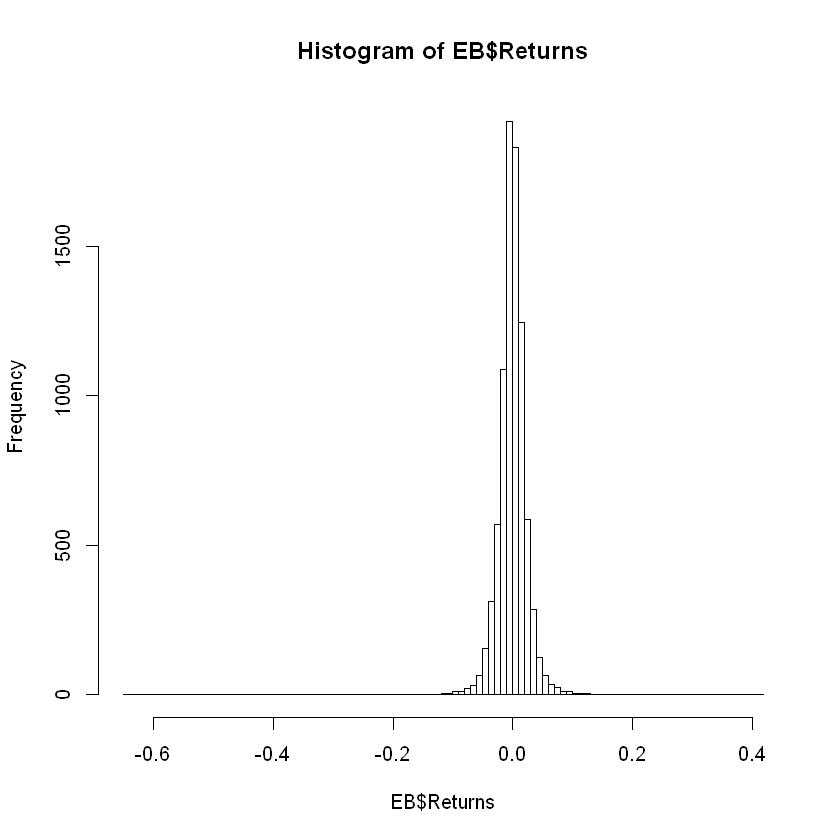

Quasi-Maximum likelihood estimation

Call:
qmle(yuima = model2, start = start, method = "L-BFGS-B", lower = lower, 
    upper = upper, threshold = sqrt(1/Delta))

Coefficients:
        Estimate Std. Error
sigma   99.99996          0
mu      99.99996          0
lambda   0.00100          0
beta    10.00000          0
S.Delta 10.00000          0

-2 log L: 2e+10 


Number of estimated jumps: 0

Average inter-arrival times: NaN

Average jump size: NaN

Standard Dev. of jump size: NA

Jump Threshold: 19.104973

Summary statistics for jump times:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

Summary statistics for jump size:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                


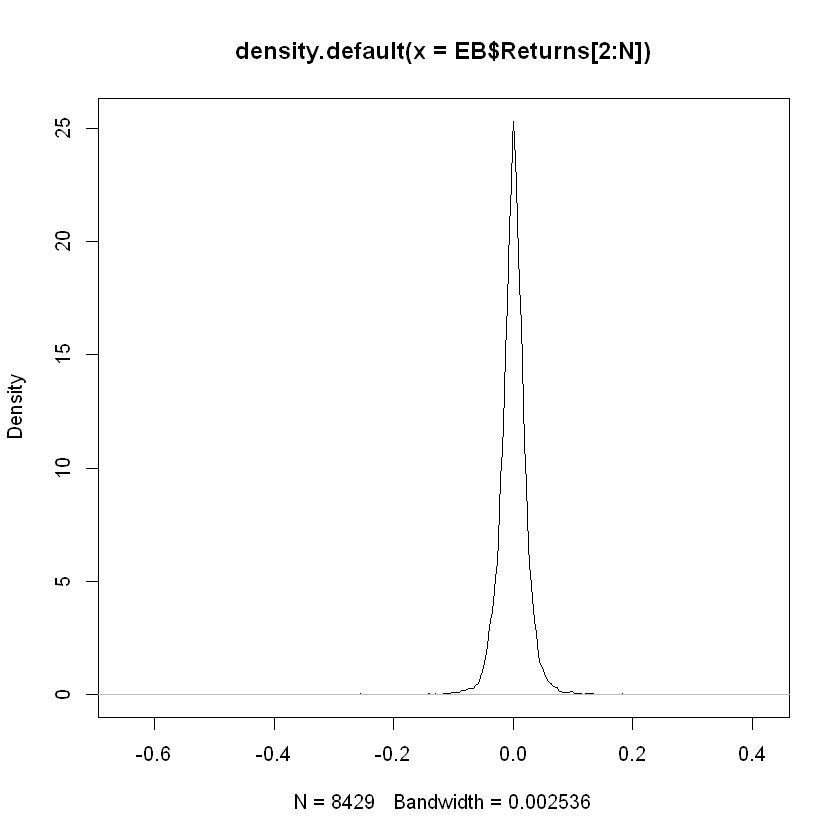

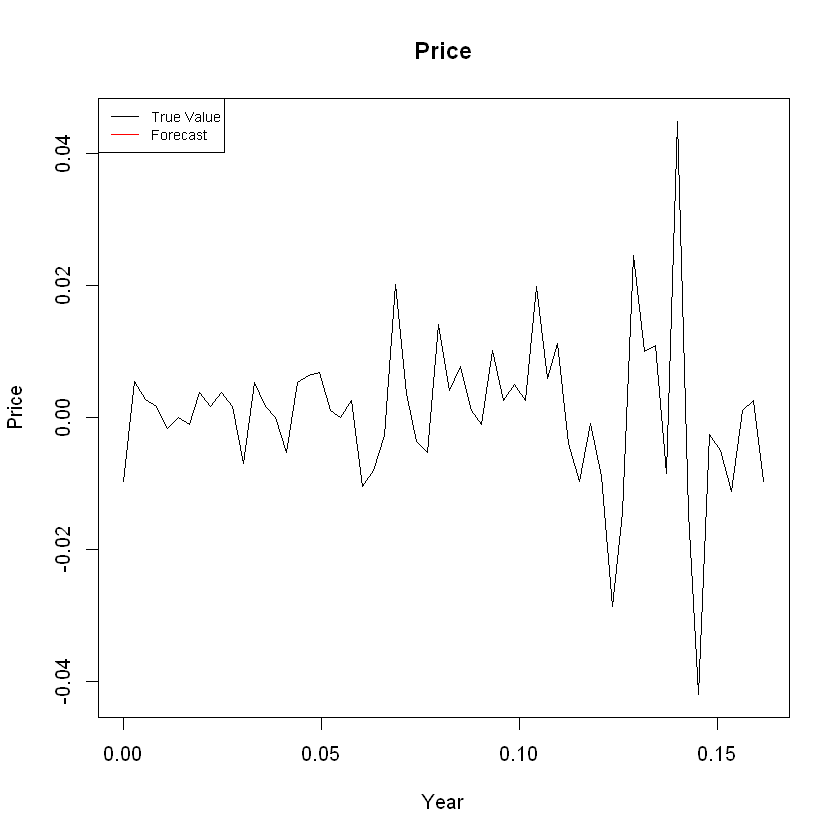

In [70]:
#install.packages('yuima')
library(zoo)
library(stats4)
library(Matrix)
library(yuima)
library(gdata)
#print()
file<- paste(getwd(),"/replication data.csv", sep='')
EB<-read.csv(file)
EB$Date <- EB[,'ï..Date']

EB$Prices <- EB$Spot
N <- length(EB$Prices)
EB[2:N, 'Returns'] <- diff(log(EB$Prices))
head(EB)
hist(EB$Returns, 80)
#length(diff(log(EB$Prices)))
N
plot(density(EB$Returns[2:N]))

options(warn=0-1)
x<-EB$Prices[1:60]
time.period<-EB$Date[1:60]
t<-as.Date(time.period,"%d/%m/%Y")
Delta<-1/365
x.data<-diff(log(x))
alpha<-mean(x.data)/Delta
b<-var(x.data)/Delta
a<-alpha+0.5*b

Y<-zoo(x.data,order.by = t)
M<- setYuima(data=setData(Y, delta=Delta))
model1<-setModel(drift="mu*x",diffusion = "sigma*x",jump.coeff = "1",measure =
                     list(intensity="lambda",df=list("dnorm(z,beta,S.Delta)")),
                     measure.type="CP", solve.variable="x")
model2<-setYuima(data=M@data,model=model1)
lower<-list(mu=0.01, sigma=0.01,lambda=0.001,beta=0.1,S.Delta=0.1)
upper<-list(mu=100, sigma=100,lambda=25,beta=100,S.Delta=100)
start<-list(mu=a, sigma=b, lambda=5, beta=10, S.Delta=10)
fit<-qmle(model2,start=start,threshold=sqrt(1/Delta),upper=upper,lower=lower,method="L-BFGS-B")

summary(fit)

plot(model2,ylab="Price", xlab="Year", main="Price")
#plots data
plot(fit,col="red") #what does this plot???
legend("topleft",col=c(1,2),lty=c(1,1),legend=c("True Value","Forecast"), cex = 0.7)

jump.count <- c('Jump Count' = fit@Jump.times)
#name(jump.count) <- 'Jump Count'
df <- rbind(data.frame(fit@coef), 0)
rownames(df) <- c(rownames(df)[1:5], 'Jump Count')